# Project 1 - Group 6
###### <font color='gray'>Authors: Aisha Baitemoriva-Othman, Adonis McQueen, Angela Kim, Deja Prade, James Kang</font>

In [1]:
## Import libraries ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Import datasets ##

# Aisha's dataset: Rotten Tomatoes
df_rt_movie_info = pd.read_csv('data/rt.movie_info.tsv.gz',sep='\t')

# Adonis's dataset: Box Office Mojo
df1 = pd.read_csv("data/bom.movie_gross.csv.gz")

# Angela's dataset: The Numbers
mb = pd.read_csv('data/tn.movie_budgets.csv.gz')

# Deja's dataset: TMDB
movie_type = pd.read_csv('data/tmdb.movies.csv.gz')

# James's datasets: IMDB
title_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')
title_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
title_akas = pd.read_csv('data/imdb.title.akas.csv.gz')

### Questions
<ul>
<li><i>Which movies have the highest gross values?
<li>What are the domestic and worldwide profits?</i>
</ul>

### Angela's Data Analysis:

In [3]:
## Preliminary analysis
mb.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [4]:
## Checking datatypes and looking for any missing values
mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


**Observations and Insights:**
<ul>
<li>There are 5782 total entries with 0 missing values.
<li>The release date column is the object datatype and should be changed to the datetime datatype.
<li>The production budget, domestic gross, and worldwide gross columns are also object datatypes and should be changed to integer.
</ul>

In [5]:
## Changing release_date to datetime
mb['release_date'] = pd.to_datetime(mb['release_date'])

## Changing production_budget, domestic_gross, and worldwide_gross to integer

mb['production_budget'] = mb['production_budget'].str.replace( ',' , '')
mb['production_budget'] = mb['production_budget'].str.replace( '$' , '')
mb['production_budget'] = pd.to_numeric(mb['production_budget'])

mb['domestic_gross'] = mb['domestic_gross'].str.replace( ',' , '')
mb['domestic_gross'] = mb['domestic_gross'].str.replace( '$' , '')
mb['domestic_gross'] = pd.to_numeric(mb['domestic_gross'])

mb['worldwide_gross'] = mb['worldwide_gross'].str.replace( ',' , '')
mb['worldwide_gross'] = mb['worldwide_gross'].str.replace( '$' , '')
mb['worldwide_gross'] = pd.to_numeric(mb['worldwide_gross'])


## Check that all changes have been correctly made
mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [6]:
## Remove rows with release_date before 2010 to focus on analyzing data from the most recent decade

mb = mb[(mb['release_date']) >= '2010-01-01']

mb.head(30)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
8,9,2017-11-17,Justice League,300000000,229024295,655945209
9,10,2015-11-06,Spectre,300000000,200074175,879620923
10,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099
11,12,2018-05-25,Solo: A Star Wars Story,275000000,213767512,393151347


In [7]:
mb.tail(30)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5717,18,2010-11-12,Tiny Furniture,50000,391674,424149
5719,20,2015-07-31,Counting,50000,8374,8374
5721,22,2014-02-14,Down and Dangerous,50000,0,0
5723,24,2015-08-04,Bending Steel,50000,0,0
5724,25,2015-09-01,"Run, Hide, Die",50000,0,0
5725,26,2014-12-31,The Image Revolution,50000,0,0
5726,27,2013-10-25,A True Story,45000,0,0
5728,29,2013-06-21,This Is Martin Bonner,42000,0,0
5730,31,2010-03-12,The Exploding Girl,40000,25572,25572
5731,32,2011-02-11,Raymond Did It,40000,3632,3632


**Observations & Insights:**
<ul>
<li>There are a lot of gross values that are 0. They also tend to correlate with movies with very small production budgets.
<li>Upon investigation, these films are usually independently made and don't apply to a large corporation like Microsoft.
</ul>

In [8]:
## Create two new columns for domestic profit and worldwide profit
## Remove rows with negative profits

mb['domestic_profit'] = (mb['domestic_gross'] - mb['production_budget'])
mb['worldwide_profit'] = (mb['worldwide_gross'] - mb['production_budget'])
mb = mb[(mb['domestic_profit'] > 0) & (mb['worldwide_profit'] > 0)]

In [9]:
## Sort by highest domestic profits

mb_dp = mb.sort_values(by=['domestic_profit'], ascending=False)
mb_dp.reset_index(inplace=True)
mb_dp.head(30)

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
0,5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220
1,41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,500059566,1148258224
2,33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,437270625,1433854864
3,43,44,2018-06-15,Incredibles 2,200000000,608581744,1242520711,408581744,1042520711
4,26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,398279547,1292935897
5,6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200
6,134,35,2017-03-17,Beauty and the Beast,160000000,504014165,1259199706,344014165,1099199706
7,44,45,2016-12-16,Rogue One: A Star Wars Story,200000000,532177324,1049102856,332177324,849102856
8,537,38,2012-03-23,The Hunger Games,80000000,408010692,677923379,328010692,597923379
9,437,38,2017-12-20,Jumanji: Welcome to the Jungle,90000000,404508916,964496193,314508916,874496193


In [10]:
## Sort by highest worldwide profits

mb_wp = mb.sort_values(by=['worldwide_profit'], ascending=False)
mb_wp.reset_index(inplace=True)
mb_wp.head(30)

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
0,6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200
1,5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220
2,33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,437270625,1433854864
3,66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,163007020,1328722794
4,26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,398279547,1292935897
5,260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,256193157,1216693157
6,41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,500059566,1148258224
7,112,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,247719760,1135772799
8,155,56,2013-11-22,Frozen,150000000,400738009,1272469910,250738009,1122469910
9,134,35,2017-03-17,Beauty and the Beast,160000000,504014165,1259199706,344014165,1099199706


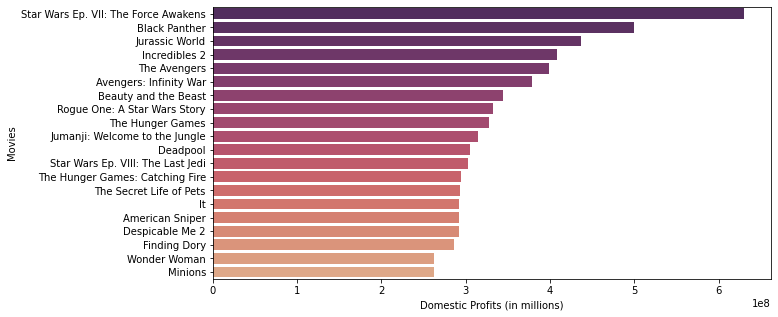

In [11]:
## Bar chart of Top 10 Movies with Highest Domestic Profits

fig, ax = plt.subplots(figsize=(10,5))

x1 = mb_dp['movie'][0:20]
y1 = mb_dp['domestic_profit'][0:20]

ax = sns.barplot(x=y1, y=x1, palette='flare_r')
ax.set(xlabel='Domestic Profits (in millions)', ylabel='Movies');

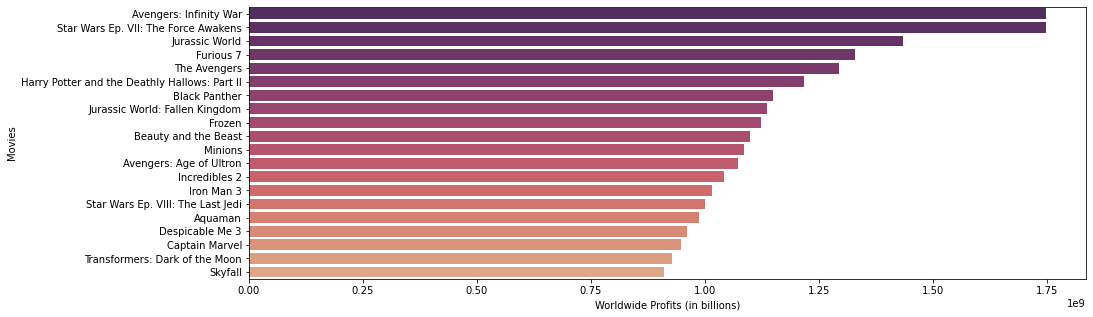

In [12]:
## Bar chart of Top 10 Movies with Highest Worldwide Profits

fig, ax = plt.subplots(figsize=(15,5))

x2 = mb_wp['movie'][0:20]
y2 = mb_wp['worldwide_profit'][0:20]

ax = sns.barplot(x=y2, y=x2, palette='flare_r')
ax.set(xlabel='Worldwide Profits (in billions)', ylabel='Movies');

#### <b>Observations & Insights:</b>
<ul>
<li>The 10 movies with highest domestic profits from 2010-mid2019 are <b><i>Star Wars Ep. VII: The Force Awakens, Black Panther, Jurassic World, Incredibles 2, The Avengers, Avengers: Infinity War, Beauty and the Beast, Rogue One: A Star Wars Story, The Hunger Games, and Jumanji: Welcome to the Jungle.</i></b>
<li>The 10 movies with highest worldwide profits from 2010-mid2019 are <b><i>Avengers: Infinity War, Star Wars Ep. VII: The Force Awakens, Jurassic World, Furious 7, The Avengers, Harry Potter and the Deathly Hallows: Part II, Black Panther, Jurassic World: Fallen Kingdom, Frozen, and Beauty and the Beast.</i></b>
<li>The most frequently occuring genres of the top 20 films are <b><i>Sci-fi, Action, Adventure, Animation, and Superhero.</i></b>
<li>The majority of these films are part of the <b><i>Marvel</i></b> or <b><i>Star Wars</i></b> franchises.
<li>There has also been a huge focus on revitalizing or reimagining classics such as <b><i>Jurassic Park, James Bond, and Jumanji.</i></b>
<li>Many financially successful films are sequels such as <b><i>Star Wars Ep. VII, Avengers: Infinity War, Furious 7, Harry Potter and the Deathly Hallows: Parts I & II, and Incredibles 2</b></i>
</ul>